# Unstructured Data Assignment 2
## Group Members:

Teagan Milford, Madeleine Cope, Laurenz Pehl, Sameer Ahmed, Trevor Allison, Sanyam Jain

Morning Cohort (11am-1pm)

**Executive Summary:**


# Install

In [ ]:
!pip install nltk vaderSentiment spacy
!python -m spacy download en_core_web_md
import nltk
nltk.download('stopwords')

2023-10-01 22:01:53.233383: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Traceback (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 187, in _run_module_as_main
    mod_name, mod_spec, code = _get_module_details(mod_name, _Error)
  File "/usr/lib/python3.10/runpy.py", line 146, in _get_module_details
    return _get_module_details(pkg_main_name, error)
  File "/usr/lib/python3.10/runpy.py", line 110, in _get_module_details
    __import__(pkg_name)
  File "/usr/local/lib/python3.10/dist-packages/spacy/__init__.py", line 6, in <module>
    from .errors import setup_default_warnings
  File "/usr/local/lib/python3.10/dist-packages/spacy/errors.py", line 3, in <module>
    from .compat import Literal
  File "/usr/local/lib/python3.10/dist-packages/spacy/compat.py", line 4, in <module>
    from thinc.util import copy_array
  File "/usr/local/lib/python3.10/dist-packages/thinc/__init__.py", line 5, in <module>
    from .con

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import pandas as pd
from collections import Counter
import nltk
from nltk.corpus import stopwords
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import spacy
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.metrics.pairwise import cosine_similarity


In [ ]:
pd.set_option('display.max_columns', None)  # Display all columns
pd.set_option('display.width', None)        # Ensure full width is utilized in console
pd.set_option('display.max_colwidth', None)

# Scraper

In [ ]:
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd

url = 'https://www.beeradvocate.com/beer/popular/'
page = requests.get(url)
soup = BeautifulSoup(page.content, 'html.parser')

# find anchor tags
tag = soup.find_all('a', href=lambda href: href and re.match(r'/beer/profile/\w+/\w+', href))
data = []

# go through links
for single_tag in tag:
    link = single_tag.get('href')
    product_list_url = 'https://www.beeradvocate.com' + link

    new_page = requests.get(product_list_url)
    new_soup = BeautifulSoup(new_page.content, 'html.parser')

    title = single_tag.get_text(strip=True)

    divs = new_soup.find_all('span', class_='muted')
    rating_div_BAscore = new_soup.find_all('span', class_='BAscore_norm')

    # reg x patterns
    pattern_decimal = r'<b>(\d+\.\d+)</b>'
    pattern_integer = r'<b>(\d+)</b>'
    pattern_decimal_BAscore_norm = r'<span class="BAscore_norm">(\d+\.\d+)</span>'
    pattern_integer_BAscore_norm = r'<span class="BAscore_norm">(\d+)</span>'

    ratings_list = []

    for rating_div in divs:
        ratings_decimal = re.findall(pattern_decimal, str(rating_div))
        ratings_integer = re.findall(pattern_integer, str(rating_div))
        ratings_list.extend(ratings_decimal)
        ratings_list.extend(ratings_integer)

    for rating_div in rating_div_BAscore:
        ratings_decimal = re.findall(pattern_decimal_BAscore_norm, str(rating_div))
        ratings_integer = re.findall(pattern_integer_BAscore_norm, str(rating_div))
        ratings_list.extend(ratings_decimal)
        ratings_list.extend(ratings_integer)

    div_with_text = new_soup.find_all('div', style='margin:20px 0px; font-size:11pt; line-height:1.4;')
    text = [div.get_text(strip=True) for div in div_with_text]

    num_reviews = len(text)
    ratings_list = ratings_list[:num_reviews]

    info = [{'Title': title, 'Review': review, 'Rating': rating} for review, rating in zip(text, ratings_list)]

    data.extend(info)

df = pd.DataFrame(data)

df.to_csv('scraped_beer_data_popular.csv', index=False)

print(df)

KeyboardInterrupt: ignored

#Attribute

In [ ]:
# Only use this code block if you are using Google Colab.
# If you are using Jupyter Notebook, please ignore this code block. You can directly upload the file to your Jupyter Notebook file systems.
from google.colab import files

## It will prompt you to select a local file. Click on “Choose Files” then select and upload the file.
## Wait for the file to be 100% uploaded. You should see the name of the file once Colab has uploaded it.
uploaded = files.upload()

Saving scraped_beer_data.csv to scraped_beer_data (1).csv
Saving scraped_beer_data2.csv to scraped_beer_data2 (1).csv


In [ ]:
df1 = pd.read_csv('scraped_beer_data.csv')

In [ ]:
df2 = pd.read_csv('scraped_beer_data2.csv')

In [ ]:
df_result = pd.concat([df1, df2],ignore_index=True)
df_result

Title  \
0                          Breakfast Stout   
1                            90 Minute IPA   
2                          Two Hearted IPA   
3                          Pliny The Elder   
4                             Heady Topper   
..                                     ...   
495                              The Abyss   
496  All That Is And All That Ever Will Be   
497                                Abraxas   
498                         Stickee Monkee   
499                   Samuel Adams Utopias   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [ ]:
import pandas as pd
from collections import Counter

stop_words = set(stopwords.words('english'))

# Combine DataFrame reviews into one text
all_reviews = " ".join(df_result['text'].tolist()).lower()

# Tokenize the reviews
words = all_reviews.split()

# Filter out stopwords and count the frequencies
filtered_words = [word for word in words if word not in stop_words]
word_freq = Counter(filtered_words)


In [ ]:
word_freq.most_common()[0:50]

[('beer', 1401),
 ('dark', 1208),
 ('-', 1117),
 ('head', 997),
 ('like', 928),
 ('taste', 922),
 ('light', 871),
 ('good', 777),
 ('nice', 760),
 ('one', 737),
 ('medium', 693),
 ('sweet', 689),
 ('white', 644),
 ('bit', 614),
 ('notes', 596),
 ('little', 588),
 ('brown', 574),
 ('malt', 546),
 ('chocolate', 543),
 ('great', 497),
 ('flavor', 497),
 ('body', 497),
 ('black', 475),
 ('bottle', 473),
 ('really', 472),
 ('well', 463),
 ('coffee', 459),
 ('much', 457),
 ('bitter', 453),
 ('orange', 433),
 ('hop', 432),
 ('head.', 425),
 ('aroma', 423),
 ('citrus', 392),
 ('chocolate,', 379),
 ('pours', 379),
 ('nose', 370),
 ('smooth', 367),
 ('beer.', 354),
 ('strong', 350),
 ('slightly', 346),
 ('color', 346),
 ('full', 335),
 ('roasted', 333),
 ('still', 325),
 ('bitterness', 324),
 ('would', 322),
 ('quite', 318),
 ('slight', 314),
 ('fruit', 302)]

# Cosine Similarity

In [ ]:
# Only use this code block if you are using Google Colab.
# If you are using Jupyter Notebook, please ignore this code block. You can directly upload the file to your Jupyter Notebook file systems.
from google.colab import files

## It will prompt you to select a local file. Click on “Choose Files” then select and upload the file.
## Wait for the file to be 100% uploaded. You should see the name of the file once Colab has uploaded it.
uploaded = files.upload()

Saving scraped_beer_data_popular.csv to scraped_beer_data_popular (1).csv
Saving scraped_beer_data_toprated.csv to scraped_beer_data_toprated (1).csv


In [ ]:
cosine_df = pd.read_csv('scraped_beer_data_toprated.csv')
cosine_df2 = pd.read_csv('scraped_beer_data_popular.csv')
cosine_merged = pd.concat([cosine_df, cosine_df2])

In [ ]:
brand_reviews_count = cosine_merged.groupby('Title').count().reset_index()

# Get brands with more than 8 reviews
brands_over_X_reviews = brand_reviews_count[brand_reviews_count['Review'] > 8]

cosine_merged = cosine_merged[cosine_merged['Title'].isin(brands_over_X_reviews['Title'])]
cosine_merged.head(3)

,Title,Review,Rating
23,Blessed,"2021 editiion, drank May 2022. So sweet, even the small bottle was a lot to drink solo. Ten Years was much more balanced.",4.93
24,Blessed,"Pours squid ink black and settles in the glass like a black velvet cloak, stopping all light, sitting under a sudsy dark tan head that dissipates quickly, as expected with a beer of this gravity. Absolutely gorgeous imperial stout.I don’t know if the nose of a beer can be decadent, but this beer’s nose is, with rich cocoa and vanilla notes up front, some dark cherries, and a sledgehammer of oak and barrel notes.The taste is led by the vanilla and cocoa notes, and they are rich and chewy, moving into the dark cherry flavors to cut the sweetness a bit, and then finishing with the oak and a welcome boozy warming from the three bourbon barrels featured in this beer.The mouthfeel is as rich and decadent as a gooey bourbon soaked brownie sitting in a dip of vanilla ice cream. I can’t imagine a more perfect rendering of a BA imperial stout.",4.75
25,Blessed,"If Woodford Reserve, Willet and Heavenly Hill were to get together and make a beery baby, they would be so blessed to have this stout. Slumbering away for extended aging these three barrels give Anchorage Brewing a love child that can compete with the best.Jet black and pouring like inky tar, Blessed pours with a luscious, ominous and velvety pour. While shy on froth the overwhelming scent of molasses, chocolate, whisky, oak, coconut and cream align with stronger scents of coffee and campfire. Once on the tongue, the immense sweetness of molasses, brown sugar and fudge carry and nearly brownie-batter taste with those sweeter bourbon barrels playing a maple and coconut sweetness.As the sweeter flavors swirl on the tastebuds, notions of mound and almond joy pop off of the middle palate while the malts remain juicy and plush. Trailing into a smooth espresso, cappuccino character, the late taste brings out all of those coconut, toasted oak, vanilla, cherry and savory smoke to have the session trending warm, sultry and savory set of pleasantries.Full bodied, pillowy and fortified with nearly port-like proportions, the stout is simply magical. It pushes the boundaries in what is a fully malted imperial stout before pushing into the pastry realm. The warmth of whisky is soothed with caramel malts, vanilla and coconut and balances the sheer malts with utter ease.",4.75


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

#what is happening - it is getting the TD-IDF scores of each word then making that into a vector.
#takes the attributes and that becomes a vector
#co-sine similarity between the two

tfidf_vectorizer = TfidfVectorizer(vocabulary=['dark', 'malt', 'chocolate'])
tfidf_matrix = tfidf_vectorizer.fit_transform(cosine_merged['Review'])

cosine_similarities = linear_kernel(tfidf_matrix, tfidf_matrix) # Compute similarity scores


cosine_merged['Average_Similarity'] = cosine_similarities.mean(axis=1) # the average here is the average for the 3 attributes

In [ ]:
cosine_merged.head(2)

,Title,Review,Rating,Average_Similarity
23,Blessed,"2021 editiion, drank May 2022. So sweet, even the small bottle was a lot to drink solo. Ten Years was much more balanced.",4.93,0.000000
24,Blessed,"Pours squid ink black and settles in the glass like a black velvet cloak, stopping all light, sitting under a sudsy dark tan head that dissipates quickly, as expected with a beer of this gravity. Absolutely gorgeous imperial stout.I don’t know if the nose of a beer can be decadent, but this beer’s nose is, with rich cocoa and vanilla notes up front, some dark cherries, and a sledgehammer of oak and barrel notes.The taste is led by the vanilla and cocoa notes, and they are rich and chewy, moving into the dark cherry flavors to cut the sweetness a bit, and then finishing with the oak and a welcome boozy warming from the three bourbon barrels featured in this beer.The mouthfeel is as rich and decadent as a gooey bourbon soaked brownie sitting in a dip of vanilla ice cream. I can’t imagine a more perfect rendering of a BA imperial stout.",4.75,0.216409


# Sentiment Score

In [ ]:
analyzer = SentimentIntensityAnalyzer()

def vader_sentiment(text):
    return analyzer.polarity_scores(text)['compound']

cosine_merged['Sentiment_Score'] = cosine_merged['Review'].apply(vader_sentiment)

In [ ]:
cosine_merged.head(2)

,Title,Review,Rating,Average_Similarity,Sentiment_Score
23,Blessed,"2021 editiion, drank May 2022. So sweet, even the small bottle was a lot to drink solo. Ten Years was much more balanced.",4.93,0.000000,0.5949
24,Blessed,"Pours squid ink black and settles in the glass like a black velvet cloak, stopping all light, sitting under a sudsy dark tan head that dissipates quickly, as expected with a beer of this gravity. Absolutely gorgeous imperial stout.I don’t know if the nose of a beer can be decadent, but this beer’s nose is, with rich cocoa and vanilla notes up front, some dark cherries, and a sledgehammer of oak and barrel notes.The taste is led by the vanilla and cocoa notes, and they are rich and chewy, moving into the dark cherry flavors to cut the sweetness a bit, and then finishing with the oak and a welcome boozy warming from the three bourbon barrels featured in this beer.The mouthfeel is as rich and decadent as a gooey bourbon soaked brownie sitting in a dip of vanilla ice cream. I can’t imagine a more perfect rendering of a BA imperial stout.",4.75,0.216409,0.9881


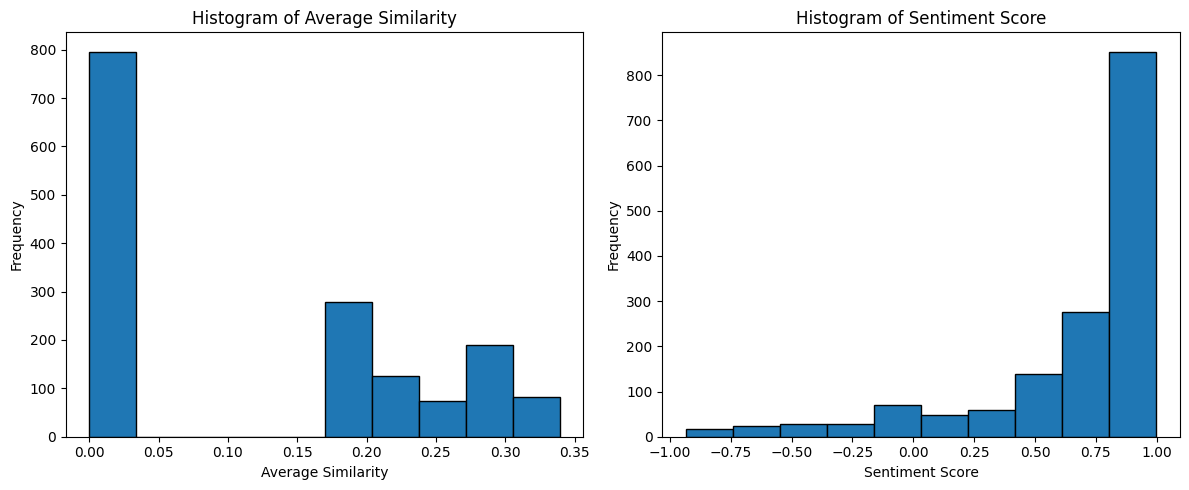

In [ ]:
#Visualizing Sentiment score and similarity score

import matplotlib.pyplot as plt
import pandas as pd

# Plotting
plt.figure(figsize=(12, 5))

# Histogram for Average_Similarity
plt.subplot(1, 2, 1)
plt.hist(cosine_merged['Average_Similarity'], bins=10, edgecolor='k')
plt.title('Histogram of Average Similarity')
plt.xlabel('Average Similarity')
plt.ylabel('Frequency')

# Histogram for Sentiment_Score
plt.subplot(1, 2, 2)
plt.hist(cosine_merged['Sentiment_Score'], bins=10, edgecolor='k')
plt.title('Histogram of Sentiment Score')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')

# Show the plots
plt.tight_layout()
plt.show()

# i **Recommendation**

In [ ]:
cosine_merged['Normalized_Sentiment'] = (cosine_merged['Sentiment_Score'] + 1) / 2  # Assuming VADER sentiment (-1 to 1)

# Combining score
weight_similarity = 0.7
weight_sentiment = 0.3

cosine_merged['Combined_Score'] = weight_similarity * cosine_merged['Average_Similarity'] + weight_sentiment * cosine_merged['Normalized_Sentiment']

brand_scores = cosine_merged.groupby('Title').agg({
    'Average_Similarity': 'mean',
    'Normalized_Sentiment': 'mean',
    'Combined_Score': 'mean'
}).reset_index()

recommended_brand_bow = brand_scores.sort_values(by='Combined_Score', ascending=False).iloc[0:3]['Title']
print(f"We recommend you to buy: {recommended_brand_bow.values}")


We recommend you to buy: ['BDCS' 'Expedition Stout' 'Darkness']


# Task F

How would your recommendation change if you use word vectors (e.g., the spaCy package with
medium sized pretrained word vectors) instead of the plain vanilla bag-of-words cosine similarity? One
way to analyze the difference would be to consider the % of reviews that mention a preferred attribute.
E.g., if you recommend a product, what % of its reviews mention an attribute specified by the customer?
Do you see any difference across bag-of-words and word vector approaches? Explain. This article may be
useful: https://medium.com/swlh/word-embeddings-versus-bag-of-words-the-curious-case-of-
recommender-systems-6ac1604d4424?source=friends_link&sk=d746da9f094d1222a35519387afc6338
Note that the article doesn’t claim that bag-of-words will always be better than word embeddings for
recommender systems. It lays out conditions under which it is likely to be the case. That is, depending
on the attributes you use, you may or may not see the same effect.

In [ ]:
import spacy
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

nlp = spacy.load('en_core_web_md')

cosine_merged['Vector'] = cosine_merged['Review'].apply(lambda x: nlp(x).vector)

attributes = ['dark', 'malt', 'chocolate']
attribute_vectors = [nlp(attr).vector for attr in attributes]
attribute_matrix = np.array(attribute_vectors)


#dot product of 2 vectors / mag x and mag y
def calculate_similarity(review_vector):
    return np.mean([np.dot(review_vector, attr_vec) / (np.linalg.norm(review_vector) * np.linalg.norm(attr_vec)) for attr_vec in attribute_vectors])

# def calculate_similarity(review_vector):
#     review_vector_reshaped = review_vector.reshape(1, -1)  # Reshape the review vector
#     similarity_scores = cosine_similarity(review_vector_reshaped, attribute_matrix)
#     return similarity_scores.mean()  # Return the mean similarity score

cosine_merged['Similarity_Score'] = cosine_merged['Vector'].apply(calculate_similarity)
cosine_merged['Similarity_Score'] = weight_similarity * cosine_merged['Similarity_Score'] + weight_sentiment * cosine_merged['Normalized_Sentiment']

In [ ]:
# Aggregate scores at the brand level
brand_scores = cosine_merged.groupby('Title').agg({
    'Similarity_Score': 'mean'
}).reset_index()

# Recommend the brand with the highest similarity score
recommended_brand_vector = brand_scores.sort_values(by='Similarity_Score', ascending=False).iloc[0:3]['Title']
print(f"We recommend you to buy: {recommended_brand_vector.values}")

We recommend you to buy: ['Dirty Bastard' 'Organic Chocolate Stout'
 'Sublimely Self-Righteous Black IPA']


In [ ]:
attributes = ['dark', 'malt', 'chocolate']

#percetage of the reviews that have X attributes
def attribute_percentage(brand, attributes):
    brand_reviews = cosine_merged[cosine_merged['Title'] == brand]['Review']
    count = sum([any(attr in review for attr in attributes) for review in brand_reviews])
    return count / len(brand_reviews) * 100

bow_brands = recommended_brand_bow
vector_brands = recommended_brand_vector

# Compute percentages for the recommended brands
bow_percentages = {brand: attribute_percentage(brand, attributes) for brand in bow_brands}
vector_percentages = {brand: attribute_percentage(brand, attributes) for brand in vector_brands}

print("BoW Recommendations with attribute percentages:")
for brand, percent in bow_percentages.items():
    print(f"{brand}: {percent:.2f}%")

print("\nVector Recommendations with attribute percentages:")
for brand, percent in vector_percentages.items():
    print(f"{brand}: {percent:.2f}%")


BoW Recommendations with attribute percentages:
BDCS: 100.00%
Expedition Stout: 100.00%
Darkness: 88.89%

Vector Recommendations with attribute percentages:
Dirty Bastard: 72.73%
Organic Chocolate Stout: 88.89%
Sublimely Self-Righteous Black IPA: 66.67%


In [ ]:
# shows how many reviews are in each brand
for brand in bow_brands:
  print(len(cosine_merged[cosine_merged['Title'] == brand]))

10
11
18


In [ ]:
# shows how many reviews are in each brand

for brand in vector_brands:
  print(len(cosine_merged[cosine_merged['Title'] == brand]))

11
9
9


*How would your recommendation change if you use word vectors instead of the plain vanilla bag-of-words cosine similarity? Do you see any difference across bag-of-words and word vector approaches? Explain.*



#Task G
How would your recommendations differ if you ignored the similarity and feature sentiment
scores and simply chose the 3 highest rated products from your entire dataset? Would these products
meet the requirements of the user looking for recommendations? Why or why not? Justify your answer
with analysis. Use the similarity and sentiment scores as well as overall ratings to answer this question.



In [ ]:
# Group by brand and calculate the mean rating and count of ratings
brand_ratings = cosine_merged.groupby('Title').agg(MeanRating=('Rating', 'mean'), TotalRatings=('Rating', 'count')).reset_index()

# Calculate C (mean rating across all brands) and m (minimum ratings required)
C = brand_ratings['MeanRating'].mean()
m = brand_ratings['TotalRatings'].quantile(0.50)  # Adjust the quantile value as needed

# Compute the weighted rating for each brand
brand_ratings['WeightedRating'] = (brand_ratings['TotalRatings'] / (brand_ratings['TotalRatings'] + m) * brand_ratings['MeanRating']) + (m / (brand_ratings['TotalRatings'] + m) * C)

# Get the top 3 brands by weighted rating
top_3_brands = brand_ratings.sort_values('WeightedRating', ascending=False).head(3)

print("Top 3 highest rated brands are:")
for idx, row in top_3_brands.iterrows():
    print(f"{idx + 1}. {row['Title']} with a weighted rating of {row['WeightedRating']:.2f}")

Top 3 highest rated brands are:
88. Pliny The Younger with a weighted rating of 4.57
22. Blessed with a weighted rating of 4.49
58. Heady Topper with a weighted rating of 4.49


In [ ]:
# Your preferred attributes
attributes = ['dark', 'malt', 'chocolate']

# Define a function to compute the percentage of reviews mentioning the attributes for a given brand
def attribute_percentage(brand, attributes):
    brand_reviews = cosine_merged[cosine_merged['Title'] == brand]['Review']
    count = sum([any(attr in review for attr in attributes) for review in brand_reviews])
    return count / len(brand_reviews) * 100

top_brands = ['Pliny The Younger', 'Blessed', "Heady Topper"]

top_brands = {brand: attribute_percentage(brand, attributes) for brand in top_brands}

print("Top Recommendations with attribute percentages:")
for brand, percent in top_brands.items():
    print(f"{brand}: {percent:.2f}%")


Top Recommendations with attribute percentages:
Pliny The Younger: 0.00%
Blessed: 55.56%
Heady Topper: 28.57%


In [ ]:
brand_scores[brand_scores['Title'].isin(top_brands)]

,Title,Similarity_Score
21,Blessed,0.254636
57,Heady Topper,0.290398
87,Pliny The Younger,0.258013


# Task H:
Using the top four attributes of beer (from word frequency analysis), calculate the lifts between
these attributes and any 10 beers in your data. Choose one beer, and find the most similar beer (among
the remaining 9) using the lift values. Explain your method.
These links may be helpful:
https://medium.datadriveninvestor.com/who-is-your-competitor-in-the-era-of-the-long-tail-d0ac24fedde8
An actual recommender using this approach: https://runningshoesforyou.com


In [ ]:
import pandas as pd
import string
from nltk.tokenize import word_tokenize
from tabulate import tabulate
import random

lift_values = []

top_attributes = ['chocolate', 'coffee', 'malt', 'dark']

top_beers = random.sample(df_result['Title'].tolist(),11)

for beer in top_beers:
    for attribute in top_attributes:
        n_attribute = len(df_result[(df_result['Title'] == beer) & (df_result['text'].str.contains(attribute))])

        n_freq = len(df_result[df_result['text'].str.contains(attribute)])

        beer_freq = len(df_result[df_result['Title']==beer])

        lift = (len(df_result * n_attribute) / (n_freq * beer_freq))

        lift_values.append({'Beer': beer, 'Attribute': attribute, 'Lift': lift})

lift_df = pd.DataFrame(lift_values)
beer_lift = lift_df.pivot_table(values='Lift', index='Beer', columns='Attribute')

display = tabulate(beer_lift, headers='keys')
print(display)

Beer                              chocolate    coffee      dark      malt
------------------------------  -----------  --------  --------  --------
Black Note Stout                   1.34409   1.85185   0.976562  0.698324
Bourbon Barrel Oro Negro           2.68817   3.7037    1.95312   1.39665
Double Barrel Jesus                2.68817   3.7037    1.95312   1.39665
Enjoy By IPA                       2.68817   3.7037    1.95312   1.39665
IPA                                0.672043  0.925926  0.488281  0.349162
Imperial Stout                     1.34409   1.85185   0.976562  0.698324
Nillerzzzzz                        2.68817   3.7037    1.95312   1.39665
Pseudo Sue - Double Dry-Hopped     2.68817   3.7037    1.95312   1.39665
Resin                              2.68817   3.7037    1.95312   1.39665
Swish                              2.68817   3.7037    1.95312   1.39665
Zenne Y Frontera                   2.68817   3.7037    1.95312   1.39665


In [ ]:
t_beer_lift = beer_lift.T
t_beer_lift.mean()
print(t_beer_lift.mean())

Beer
Black Note Stout                  1.217706
Bourbon Barrel Oro Negro          2.435412
Double Barrel Jesus               2.435412
Enjoy By IPA                      2.435412
IPA                               0.608853
Imperial Stout                    1.217706
Nillerzzzzz                       2.435412
Pseudo Sue - Double Dry-Hopped    2.435412
Resin                             2.435412
Swish                             2.435412
Zenne Y Frontera                  2.435412
dtype: float64


In [ ]:
selected_beer = lift_df[lift_df['Beer'] == 'IPA']
other_beer = lift_df[lift_df['Beer'] != 'IPA']
other_beers = other_beer['Beer'].unique()

In [ ]:
differences = {}

for beer in other_beers:
  difference = 0
  df_beer = lift_df[lift_df['Beer'] == beer]
  for i in range(len(df_beer['Lift'])):
    difference += abs(df_beer['Lift'].values[i] - selected_beer['Lift'].values[i])
  differences[beer] = difference

In [ ]:
similar = min(differences, key=lambda k: differences[k])
print("The most similar beer is", similar)
print("Lift Difference:", differences[similar])

The most similar beer is Imperial Stout
Lift Difference: 2.4354121978517984
